In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import ast
import math
from sklearn import preprocessing

%matplotlib inline

In [126]:
datawatch = pd.read_csv("smartwatch.csv")
dataphone = pd.read_csv("smartphone.csv")
dataphone2 = pd.read_csv("smartphone.csv")
report = pd.read_csv("report.csv")

In [3]:
datawatch.source.describe()

count         200471
unique            12
top       heart_rate
freq           91337
Name: source, dtype: object

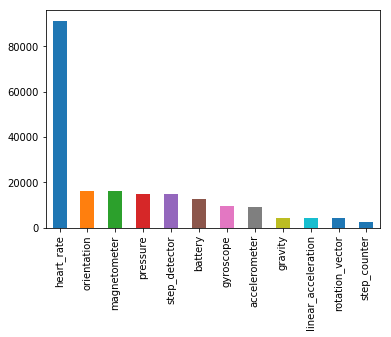

In [4]:
datawatch.source.value_counts().plot(kind='bar')


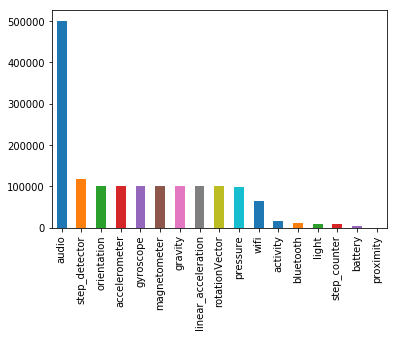

In [5]:
dataphone.source.value_counts().plot(kind='bar')

In [127]:
datawatch.timestamp.describe()
datawatch

,index,source,timestamp,values
0,164349,battery,2017-06-29 07:45:56.262,['98']
1,164350,accelerometer,2017-06-29 07:46:01.263,"['-0.3440857', '0.68330383', '9.967361']"
2,164351,gravity,2017-06-29 07:46:01.324,"['-0.34131828', '0.6573288', '9.778641']"
3,164352,linear_acceleration,2017-06-29 07:46:01.329,"['-0.018068999', '0.034808993', '-0.033065796']"
4,164353,gyroscope,2017-06-29 07:46:01.402,"['0.0041656494', '-0.0132751465', '0.006164551']"
5,164354,pressure,2017-06-29 07:46:01.464,['969.3651']
6,164355,orientation,2017-06-29 07:46:01.509,"['31.284260813896044', '-3.3376453624603086', ..."
7,164356,magnetometer,2017-06-29 07:46:01.661,"['-15.32135', '24.88861', '-44.90509']"
8,164357,rotation_vector,2017-06-29 07:46:01.719,"['0.036942374', '0.007465202', '-0.25660786', ..."
9,164358,heart_rate,2017-06-29 07:46:05.590,"['173.0', '0']"


In [128]:
datawatch.set_index('timestamp',inplace=True)

In [125]:
datawatch

,index,source,values
timestamp,,,
2017-06-29 07:45:56.262,164349,battery,['98']
2017-06-29 07:46:01.263,164350,accelerometer,"['-0.3440857', '0.68330383', '9.967361']"
2017-06-29 07:46:01.324,164351,gravity,"['-0.34131828', '0.6573288', '9.778641']"
2017-06-29 07:46:01.329,164352,linear_acceleration,"['-0.018068999', '0.034808993', '-0.033065796']"
2017-06-29 07:46:01.402,164353,gyroscope,"['0.0041656494', '-0.0132751465', '0.006164551']"
2017-06-29 07:46:01.464,164354,pressure,['969.3651']
2017-06-29 07:46:01.509,164355,orientation,"['31.284260813896044', '-3.3376453624603086', ..."
2017-06-29 07:46:01.661,164356,magnetometer,"['-15.32135', '24.88861', '-44.90509']"
2017-06-29 07:46:01.719,164357,rotation_vector,"['0.036942374', '0.007465202', '-0.25660786', ..."


In [8]:
dataphone.set_index('timestamp',inplace=True)

In [9]:
sd=datawatch[datawatch['source']=='step_detector']['values'].values
sd


array(["['1.0']", "['1.0']", "['1.0']", ..., "['1.0']", "['1.0']",
       "['1.0']"], dtype=object)

In [10]:
sc=datawatch[datawatch['source']=='step_counter']


sc.index=pd.to_datetime(sc.index)

In [129]:
type(sc.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
tempsc=[]
sc2=[]
sc['values'].values
for n in sc['values'].values:
    tempsc=ast.literal_eval(n)
    sc2.append(tempsc)


In [13]:
sc3=[]
for n in sc2:
    sc3.append(float(n[0]))

In [14]:
sc['values']=sc3

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


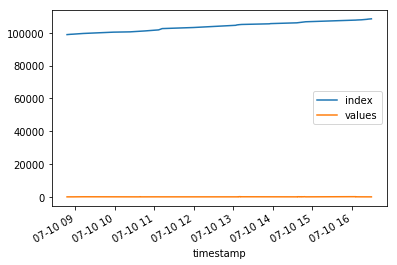

In [15]:
sc['2017-07-10':'2017-07-10 16:30'].plot()

In [16]:
tempmagnet=[]
magnetolist2=[]
magnetolist=datawatch[datawatch['source']=='magnetometer']['values'].values
for n in magnetolist:
    tempmagnet=ast.literal_eval(n)
    magnetolist2.append(tempmagnet)



In [17]:
magnetolist3=[]
i=1
for n in magnetolist2:
    magnetolist3.append([float(n[i-1]),float(n[i]),float(n[i+1])])
    



In [18]:
mx=[]
my=[]
mz=[]
for m in magnetolist3:
    mx.append(m[0])
    my.append(m[1])
    mz.append(m[2])

In [19]:
maxes = [('timestamp',datawatch[datawatch['source']=='magnetometer'].index),
        ('xaxis', mx),
         ('yaxis', my),
         ('zaxis', mz),
         ]
maxes

[('timestamp', Index(['2017-06-29 07:46:01.661', '2017-06-29 07:46:06.700',
         '2017-06-29 07:46:11.732', '2017-06-29 07:46:16.769',
         '2017-06-29 07:46:21.801', '2017-06-29 07:46:26.844',
         '2017-06-29 07:46:31.872', '2017-06-29 07:46:36.907',
         '2017-06-29 07:46:41.942', '2017-06-29 07:46:46.978',
         ...
         '2017-07-13 20:17:42.476', '2017-07-13 20:17:42.476',
         '2017-07-13 20:19:01.890', '2017-07-13 20:19:01.890',
         '2017-07-13 20:20:00.859', '2017-07-13 20:20:00.859',
         '2017-07-13 20:21:00.863', '2017-07-13 20:21:00.863',
         '2017-07-13 20:21:31.326', '2017-07-13 20:21:31.326'],
        dtype='object', name='timestamp', length=16295)),
 ('xaxis',
  [-15.32135,
   -14.96582,
   -19.198608,
   -22.219849,
   -9.135437,
   8.052063,
   8.021545,
   6.0562134,
   5.2505493,
   5.606079,
   6.6482544,
   5.155945,
   5.4107666,
   -13.630676,
   -4.6920776,
   -4.408264,
   -48.20099,
   -9.991455,
   14.994812,
   34.88

In [20]:
mdf = pd.DataFrame.from_items(maxes)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [21]:
mdf.set_index('timestamp').head()

,xaxis,yaxis,zaxis
timestamp,,,
2017-06-29 07:46:01.661,-15.321350,24.888610,-44.905090
2017-06-29 07:46:06.700,-14.965820,24.205017,-46.571350
2017-06-29 07:46:11.732,-19.198608,22.335815,-46.774292
2017-06-29 07:46:16.769,-22.219849,28.617859,-44.915770
2017-06-29 07:46:21.801,-9.135437,26.362610,-41.525270


In [22]:
mdf['timestamp']=pd.to_datetime(mdf['timestamp'])
mdf.index=mdf['timestamp']
del mdf['timestamp']

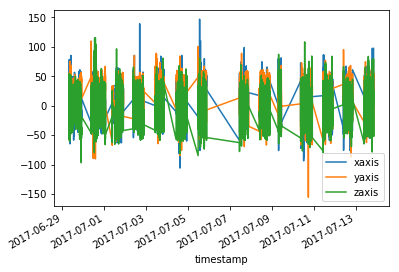

In [23]:
mdf.plot()

In [24]:
#only accelerometer
count=0


accdata=datawatch[datawatch['source']=='accelerometer'].sort_index()
accdata
accarr=accdata.values
accarr[1][2]
testarray = ast.literal_eval(accarr[0][2])
accarr[5000]

array([80215, 'accelerometer',
       "['-3.3507233', '-9.131256', '-0.33010864']"], dtype=object)

In [25]:
#only accelerometer for phone
count=0


accdataphone=dataphone[dataphone['source']=='accelerometer'].sort_index()
accdataphone
accarrphone=accdataphone.values
accarrphone[1][2]
testarrayphone = ast.literal_eval(accarrphone[0][2])
accarrphone[5000]

array([1396259, 'accelerometer',
       "['-0.31374758', '-9.263936', '0.9412427']"], dtype=object)

In [26]:
xyz=[]
for acc in accarr:
    temparray = ast.literal_eval(acc[2])

    xyz.append(temparray)
xaxis=[]
yaxis=[]
zaxis=[]



In [27]:
xyzphone=[]
for accphone in accarrphone:
    temparrayphone = ast.literal_eval(accphone[2])

    xyzphone.append(temparrayphone)
xaxisphone=[]
yaxisphone=[]
zaxisphone=[]




In [28]:
for item in xyz:
    xaxis.append(item[0])
    yaxis.append(item[1])
    zaxis.append(item[2])



In [29]:
#for phone
for itemphone in xyzphone:
    xaxisphone.append(itemphone[0])
    yaxisphone.append(itemphone[1])
    zaxisphone.append(itemphone[2])




In [30]:
axes = [('timestamp',accdata.index),
        ('xaxis', xaxis),
         ('yaxis', yaxis),
         ('zaxis', zaxis),
         ]

In [31]:
axesphone = [('timestamp',accdataphone.index),
        ('xaxis', xaxisphone),
         ('yaxis', yaxisphone),
         ('zaxis', zaxisphone),
         ]
axesphone

[('timestamp', Index(['2017-06-29 07:45:21.520', '2017-06-29 07:45:26.542',
         '2017-06-29 07:45:31.548', '2017-06-29 07:45:36.552',
         '2017-06-29 07:45:41.626', '2017-06-29 07:45:46.648',
         '2017-06-29 07:45:51.672', '2017-06-29 07:45:56.698',
         '2017-06-29 07:46:01.719', '2017-06-29 07:46:06.742',
         ...
         '2017-07-13 20:12:49.182', '2017-07-13 20:12:54.208',
         '2017-07-13 20:12:59.221', '2017-07-13 20:13:04.260',
         '2017-07-13 20:13:09.260', '2017-07-13 20:13:14.276',
         '2017-07-13 20:13:19.338', '2017-07-13 20:13:24.357',
         '2017-07-13 20:13:29.383', '2017-07-13 20:13:34.412'],
        dtype='object', name='timestamp', length=99867)),
 ('xaxis',
  ['-0.852627',
   '0.5484595',
   '0.60833496',
   '-0.1939966',
   '0.1460962',
   '-0.043110352',
   '0.18441652',
   '0.17244141',
   '0.17962648',
   '0.3544629',
   '0.28261232',
   '0.30416748',
   '0.8885523',
   '1.1663746',
   '3.5110989',
   '3.539839',
   '3.515

In [32]:
print(len(xaxis))
print(xaxis)
print(len(yaxis))
print(len(zaxis))

9265
['-0.3440857', '-0.4410553', '0.2496643', '1.0840454', '-1.2897949', '-3.341629', '-4.5243683', '-4.152069', '-4.0934143', '-4.119751', '-4.01799', '-4.0359497', '-3.9868622', '-2.0715027', '-2.3408508', '-2.2869873', '6.4721985', '-0.5236511', '-3.4864807', '-9.417404', '7.5477905', '-4.8301086', '-4.7935944', '-9.992722', '-7.9729767', '-4.8262787', '-2.858841', '-6.714218', '-3.3640137', '-4.851288', '-2.3051758', '2.4164276', '2.6705627', '0.25494385', '2.1596527', '-0.49612427', '0.7735138', '3.7919006', '-6.297867', '-5.7980804', '-5.6556244', '-6.6840515', '-6.056656', '-4.6003876', '7.0458527', '-9.482162', '-9.26297', '-9.462051', '-0.10946655', '-9.484558', '-4.0821533', '-0.48258972', '-4.982254', '3.6788788', '4.158203', '3.7851868', '3.967865', '0.65190125', '2.7950592', '2.5071716', '2.196762', '3.9707336', '3.5577393', '3.1825714', '3.0676422', '3.1239166', '3.1825714', '3.1801758', '3.308258', '3.3022766', '3.3573456', '2.8437958', '2.901245', '2.8916779', '2.89765

In [33]:
df = pd.DataFrame.from_items(axes)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [34]:
dfphone = pd.DataFrame.from_items(axesphone)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [35]:
df.head()

,timestamp,xaxis,yaxis,zaxis
0,2017-06-29 07:46:01.263,-0.3440857,0.68330383,9.967361
1,2017-06-29 07:46:06.270,-0.4410553,0.7886505,9.872787
2,2017-06-29 07:46:11.280,0.2496643,1.4255066,9.832092
3,2017-06-29 07:46:16.282,1.0840454,0.52648926,9.967361
4,2017-06-29 07:46:21.289,-1.2897949,-0.83462524,9.338882


In [36]:
dfphone.head()

,timestamp,xaxis,yaxis,zaxis
0,2017-06-29 07:45:21.520,-0.852627,4.7876444,9.029224
1,2017-06-29 07:45:26.542,0.5484595,5.47262,9.043594
2,2017-06-29 07:45:31.548,0.60833496,-9.381292,0.8167017
3,2017-06-29 07:45:36.552,-0.1939966,-8.919053,-2.912344
4,2017-06-29 07:45:41.626,0.1460962,-8.837623,-3.0776002


In [37]:
df['xaxis']= df['xaxis'].apply(pd.to_numeric, errors='coerce')
df['yaxis']= df['yaxis'].apply(pd.to_numeric, errors='coerce')
df['zaxis']= df['zaxis'].apply(pd.to_numeric, errors='coerce')

df['timestamp']=pd.to_datetime(df['timestamp'])


In [38]:
dfphone['xaxis']= dfphone['xaxis'].apply(pd.to_numeric, errors='coerce')
dfphone['yaxis']= dfphone['yaxis'].apply(pd.to_numeric, errors='coerce')
dfphone['zaxis']= dfphone['zaxis'].apply(pd.to_numeric, errors='coerce')

dfphone['timestamp']=pd.to_datetime(dfphone['timestamp'])



In [39]:
df.index=df['timestamp']

In [40]:
dfphone.index=dfphone['timestamp']

In [41]:
del df['timestamp']
df.head()

,xaxis,yaxis,zaxis
timestamp,,,
2017-06-29 07:46:01.263,-0.344086,0.683304,9.967361
2017-06-29 07:46:06.270,-0.441055,0.788651,9.872787
2017-06-29 07:46:11.280,0.249664,1.425507,9.832092
2017-06-29 07:46:16.282,1.084045,0.526489,9.967361
2017-06-29 07:46:21.289,-1.289795,-0.834625,9.338882


In [42]:
del dfphone['timestamp']
dfphone.head()

,xaxis,yaxis,zaxis
timestamp,,,
2017-06-29 07:45:21.520,-0.852627,4.787644,9.029224
2017-06-29 07:45:26.542,0.548459,5.472620,9.043594
2017-06-29 07:45:31.548,0.608335,-9.381292,0.816702
2017-06-29 07:45:36.552,-0.193997,-8.919053,-2.912344
2017-06-29 07:45:41.626,0.146096,-8.837623,-3.077600


In [43]:
#df['2017-07-13'] #returns everything in 07-13

In [44]:
df.index

DatetimeIndex(['2017-06-29 07:46:01.263000', '2017-06-29 07:46:06.270000',
               '2017-06-29 07:46:11.280000', '2017-06-29 07:46:16.282000',
               '2017-06-29 07:46:21.289000', '2017-06-29 07:46:26.296000',
               '2017-06-29 07:46:31.304000', '2017-06-29 07:46:36.309000',
               '2017-06-29 07:46:41.317000', '2017-06-29 07:46:46.323000',
               ...
               '2017-07-13 20:02:12.793000', '2017-07-13 20:02:12.793000',
               '2017-07-13 20:02:58.373000', '2017-07-13 20:02:58.373000',
               '2017-07-13 20:03:58.637000', '2017-07-13 20:03:58.637000',
               '2017-07-13 20:05:00.933000', '2017-07-13 20:05:00.933000',
               '2017-07-13 20:21:31.358000', '2017-07-13 20:21:31.358000'],
              dtype='datetime64[ns]', name='timestamp', length=9265, freq=None)

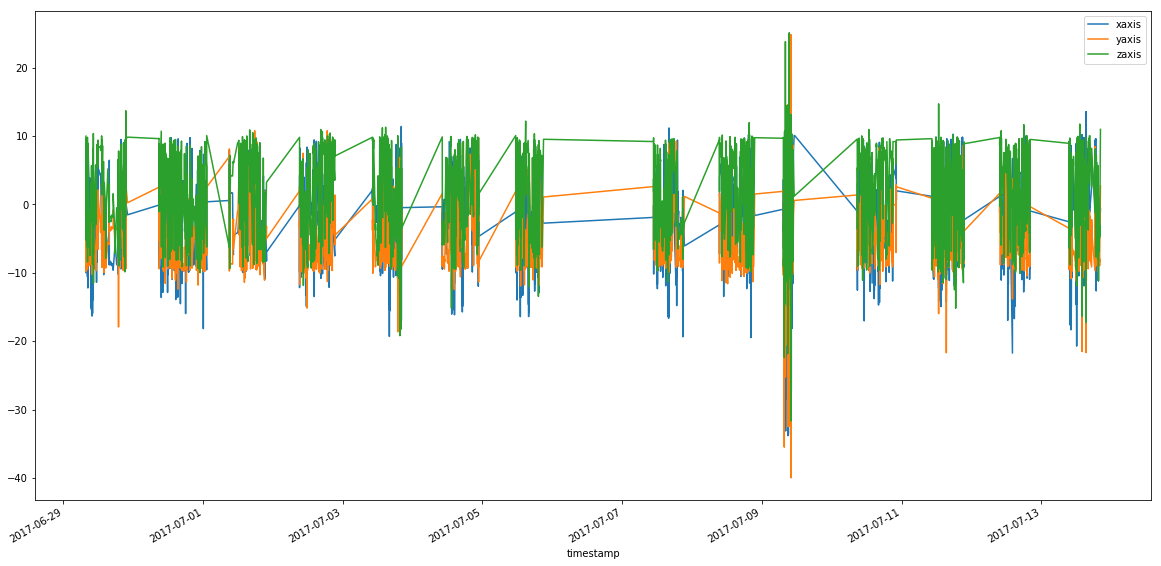

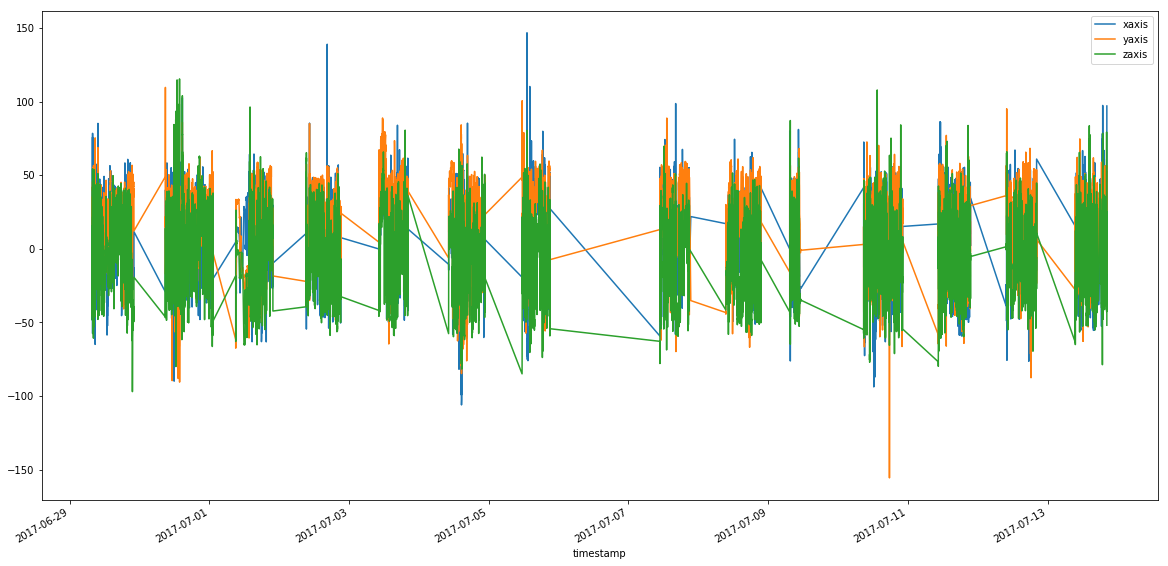

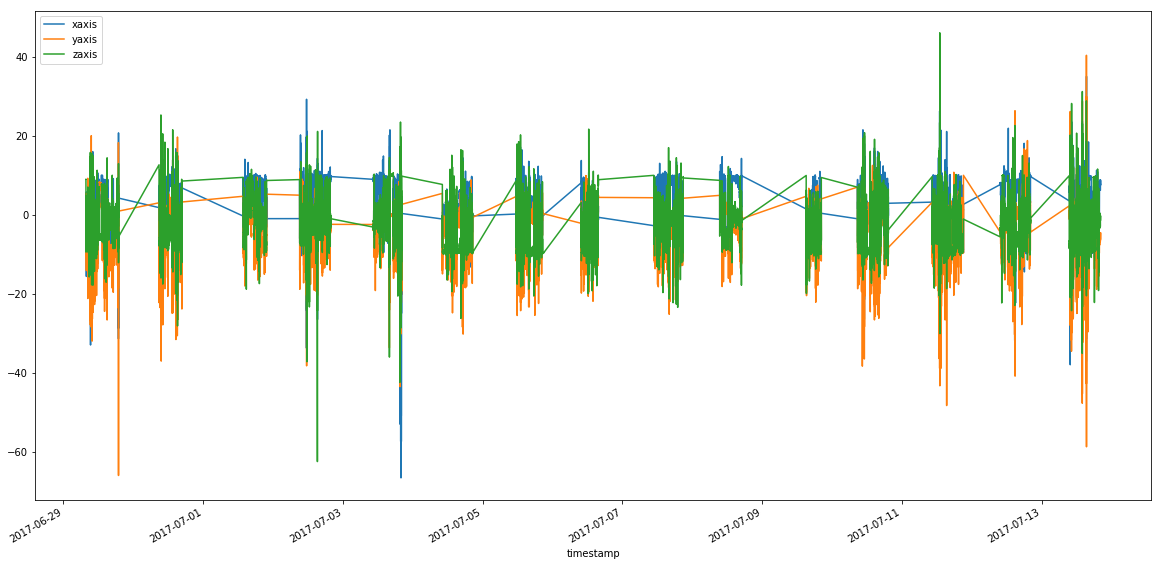

In [45]:
df.plot(figsize=(20,10))
mdf.plot(figsize=(20,10))
dfphone.plot(figsize=(20,10))



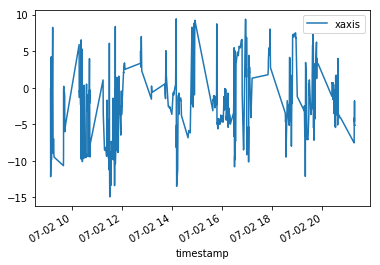

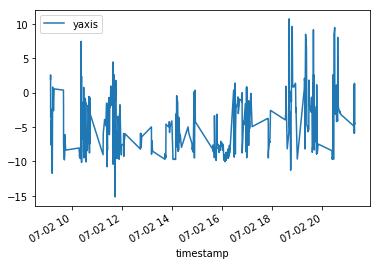

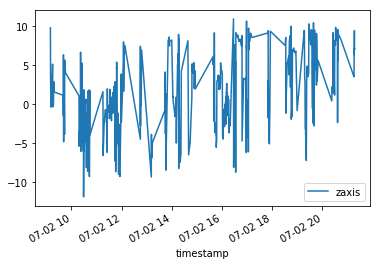

In [46]:
#daily activity
tempdf=df['2017-07-02']
tempdf.index
dg=pd.DataFrame(data=tempdf['xaxis'],index=tempdf.index, columns=['xaxis'])



dh=pd.DataFrame(data=tempdf['yaxis'],index=tempdf.index, columns=['yaxis'])

di=pd.DataFrame(data=tempdf['zaxis'],index=tempdf.index, columns=['zaxis'])
ax =dg.plot()
ay =dh.plot()
az =di.plot()
plt.gcf().autofmt_xdate()
plt.show()

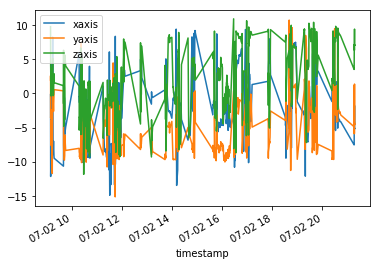

In [47]:
dh=pd.DataFrame(data=tempdf[:],index=tempdf.index, columns=['xaxis','yaxis','zaxis'])
ay=dh.plot()

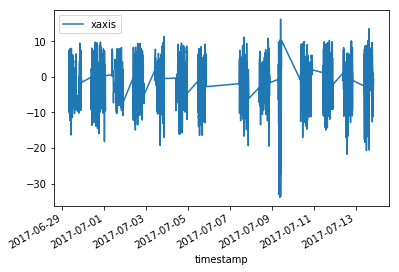

In [48]:
dc=pd.DataFrame(data=df['xaxis'],index=df.index, columns=['xaxis'])
ax =dc.plot()

plt.gcf().autofmt_xdate()
plt.show()

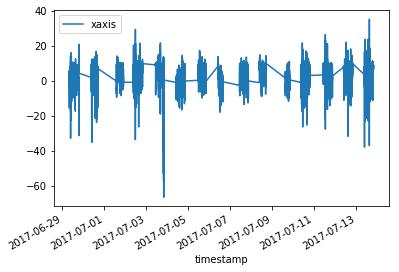

In [49]:
dd=pd.DataFrame(data=dfphone['xaxis'],index=dfphone.index, columns=['xaxis'])
ax =dd.plot()

plt.gcf().autofmt_xdate()
plt.show()

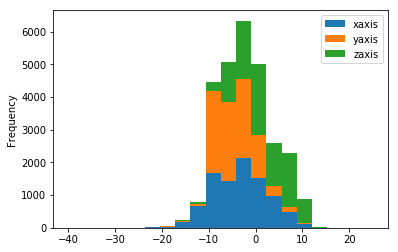

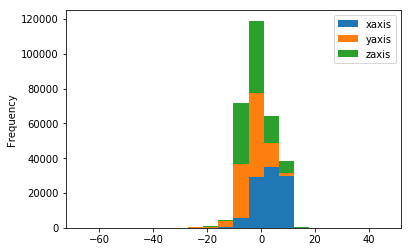

In [50]:
df.plot.hist(stacked=True, bins=20)
dfphone.plot.hist(stacked=True, bins=20)

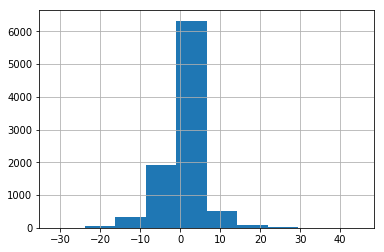

In [51]:
df['xaxis'].diff().hist()

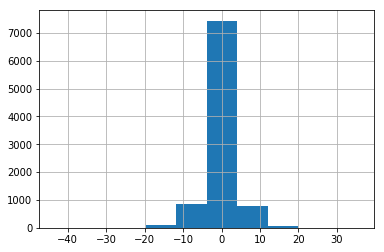

In [52]:
df['yaxis'].diff().hist()

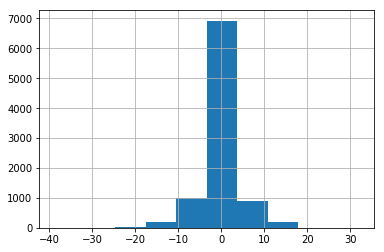

In [53]:
df['zaxis'].diff().hist()

count    82.000000
mean     10.016390
std       1.618982
min       4.641158
25%       9.557576
50%       9.736955
75%      10.253737
max      16.816869
dtype: float64
count    637.000000
mean       9.884491
std        0.772889
min        4.641158
25%        9.699548
50%        9.821520
75%        9.970891
max       16.816869
dtype: float64


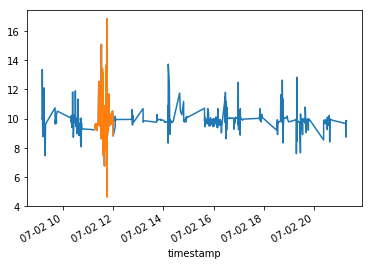

In [54]:
def magnitude(axes):
    x2 = axes['xaxis'] *axes['xaxis']
    y2 = axes['yaxis'] *axes['yaxis']
    z2 = axes['zaxis'] *axes['zaxis']
    m2 = x2 + y2 + z2
    m = m2.apply(lambda x: math.sqrt(x))
    return m

magday=magnitude(tempdf)
tempdf2=df['2017-07-02 11']
maghour=magnitude(tempdf2)
print(maghour.describe())
print(magday.describe())
magday.plot()
maghour.plot()
#while in vehicle, the magnitude is pretty high.
#standard deviation is 2 times higher.
#9	0	Eat	00:10	2017-07-02 21:55	2017-07-02 22:05	
#10	1	Watching TV	01:59	2017-07-02 20:10	2017-07-02 22:10	
#11	2	In computer	00:07	2017-07-02 19:54	2017-07-02 20:02	
#12	3	In computer	00:06	2017-07-02 19:45	2017-07-02 19:51	
#13	4	In computer	00:35	2017-07-02 19:03	2017-07-02 19:38	
#14	5	At home	04:28	2017-07-02 18:31	2017-07-02 23:00	
#15	6	In vehicle	00:51	2017-07-02 17:37	2017-07-02 18:28	
#16	7	Picnic	05:10	2017-07-02 12:25	2017-07-02 17:35	
#17	8	In vehicle	00:39	2017-07-02 11:42	2017-07-02 12:21	
#18	9	In vehicle	00:04	2017-07-02 11:20	2017-07-02 11:25	

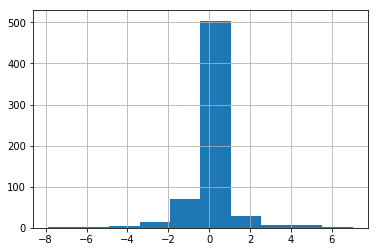

In [55]:
magday.diff().hist()

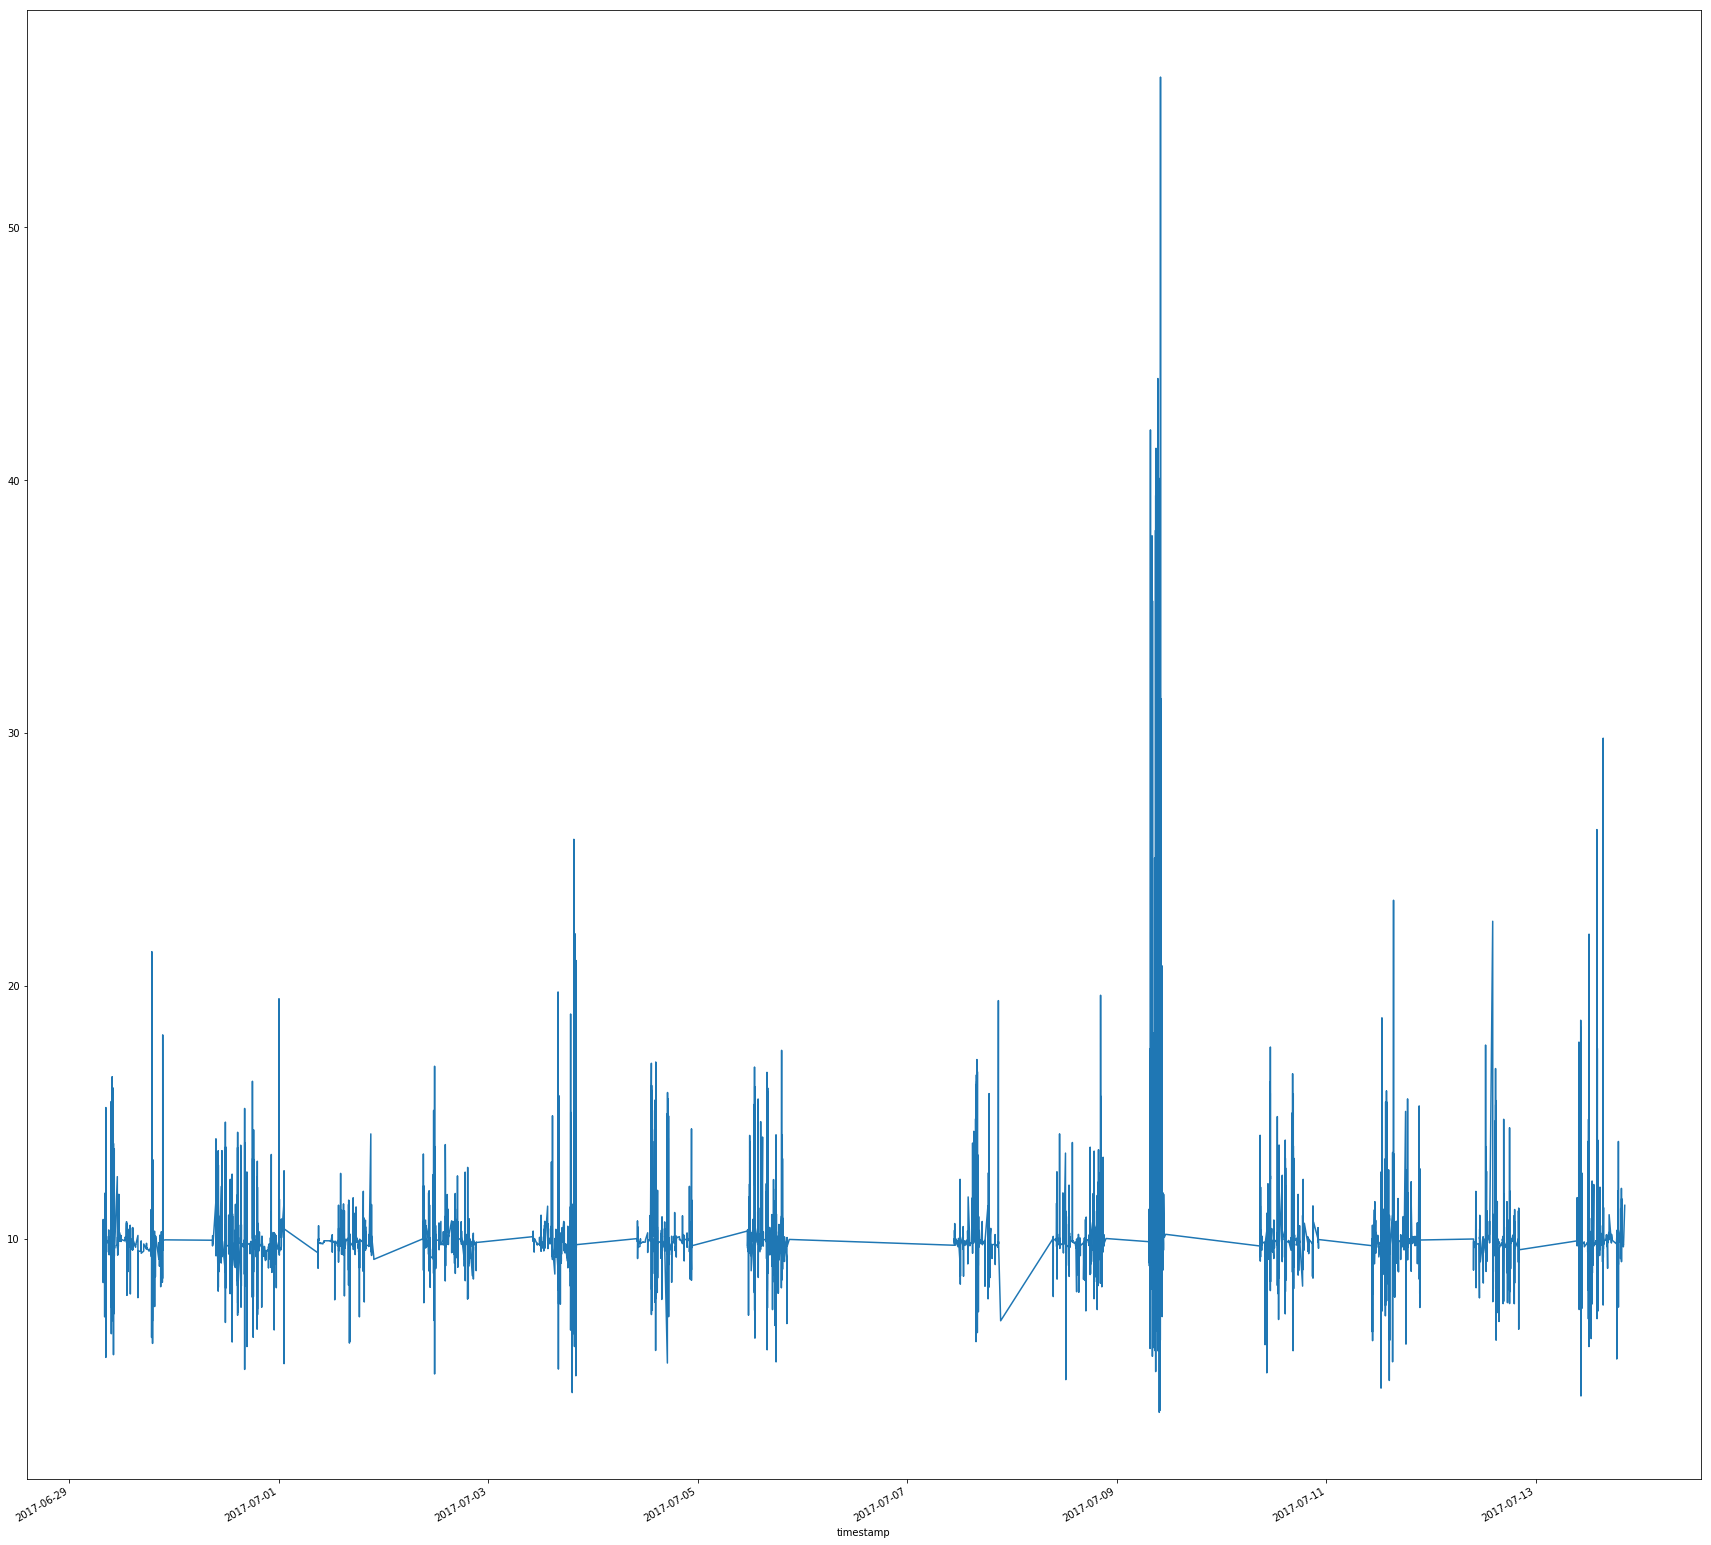

In [56]:
magmonth = magnitude(df)
magphone = magnitude(dfphone)


magmonth.plot(figsize=(30,30))

count    9265.000000
mean       10.305277
std         2.216758
min         3.122109
25%         9.713456
50%         9.859277
75%        10.066427
max        55.949306
dtype: float64

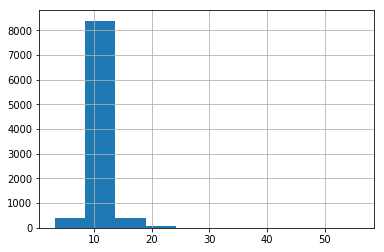

In [57]:
magmonth.hist()
magmonth.describe()

In [58]:
heartdatawatch=datawatch[datawatch['source']=='heart_rate'].sort_index()
heartdatawatch.head()

,index,source,values
timestamp,,,
2017-06-29 07:46:05.590,164358,heart_rate,"['173.0', '0']"
2017-06-29 07:46:06.590,164365,heart_rate,"['172.0', '1']"
2017-06-29 07:46:07.589,164368,heart_rate,"['171.0', '1']"
2017-06-29 07:46:09.587,164369,heart_rate,"['170.0', '1']"
2017-06-29 07:46:10.588,164370,heart_rate,"['169.0', '1']"


In [59]:
heartarray=heartdatawatch.values
heartarray[0][2]


"['173.0', '0']"

In [60]:
heartrate=[]
for rate in heartarray:
    tempheartarray = ast.literal_eval(rate[2])

    heartrate.append(tempheartarray[0])

In [61]:
heartseries = [('timestamp',heartdatawatch.index),
         ('heartrate', heartrate),
         ]
heartseries


[('timestamp', Index(['2017-06-29 07:46:05.590', '2017-06-29 07:46:06.590',
         '2017-06-29 07:46:07.589', '2017-06-29 07:46:09.587',
         '2017-06-29 07:46:10.588', '2017-06-29 07:46:11.576',
         '2017-06-29 07:46:13.575', '2017-06-29 07:46:14.579',
         '2017-06-29 07:46:15.573', '2017-06-29 07:46:16.573',
         ...
         '2017-07-13 20:21:34.984', '2017-07-13 20:21:34.984',
         '2017-07-13 20:21:35.009', '2017-07-13 20:21:35.009',
         '2017-07-13 20:21:35.020', '2017-07-13 20:21:35.020',
         '2017-07-13 20:21:35.060', '2017-07-13 20:21:35.060',
         '2017-07-13 20:21:35.124', '2017-07-13 20:21:35.124'],
        dtype='object', name='timestamp', length=91337)),
 ('heartrate',
  ['173.0',
   '172.0',
   '171.0',
   '170.0',
   '169.0',
   '168.0',
   '167.0',
   '166.0',
   '165.0',
   '164.0',
   '163.0',
   '162.0',
   '161.0',
   '160.0',
   '159.0',
   '158.0',
   '157.0',
   '156.0',
   '146.0',
   '136.0',
   '132.0',
   '131.0',
   '12

In [62]:
dfheart = pd.DataFrame.from_items(heartseries)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [63]:
dfheart.head()

,timestamp,heartrate
0,2017-06-29 07:46:05.590,173.0
1,2017-06-29 07:46:06.590,172.0
2,2017-06-29 07:46:07.589,171.0
3,2017-06-29 07:46:09.587,170.0
4,2017-06-29 07:46:10.588,169.0


In [64]:
dfheart['heartrate']= dfheart['heartrate'].apply(pd.to_numeric, errors='coerce')
dfheart['heartrate'].apply(pd.to_numeric, errors='coerce')
dfheart['heartrate'].values

array([173., 172., 171., ...,  56.,  57.,  57.])

In [65]:
dfheart['timestamp']=pd.to_datetime(dfheart['timestamp'])



In [66]:
dfheart.index=dfheart['timestamp']


In [67]:
del dfheart['timestamp']
dfheart.head()

,heartrate
timestamp,
2017-06-29 07:46:05.590,173.0
2017-06-29 07:46:06.590,172.0
2017-06-29 07:46:07.589,171.0
2017-06-29 07:46:09.587,170.0
2017-06-29 07:46:10.588,169.0


In [68]:
dfheart.dtypes

heartrate    float64
dtype: object

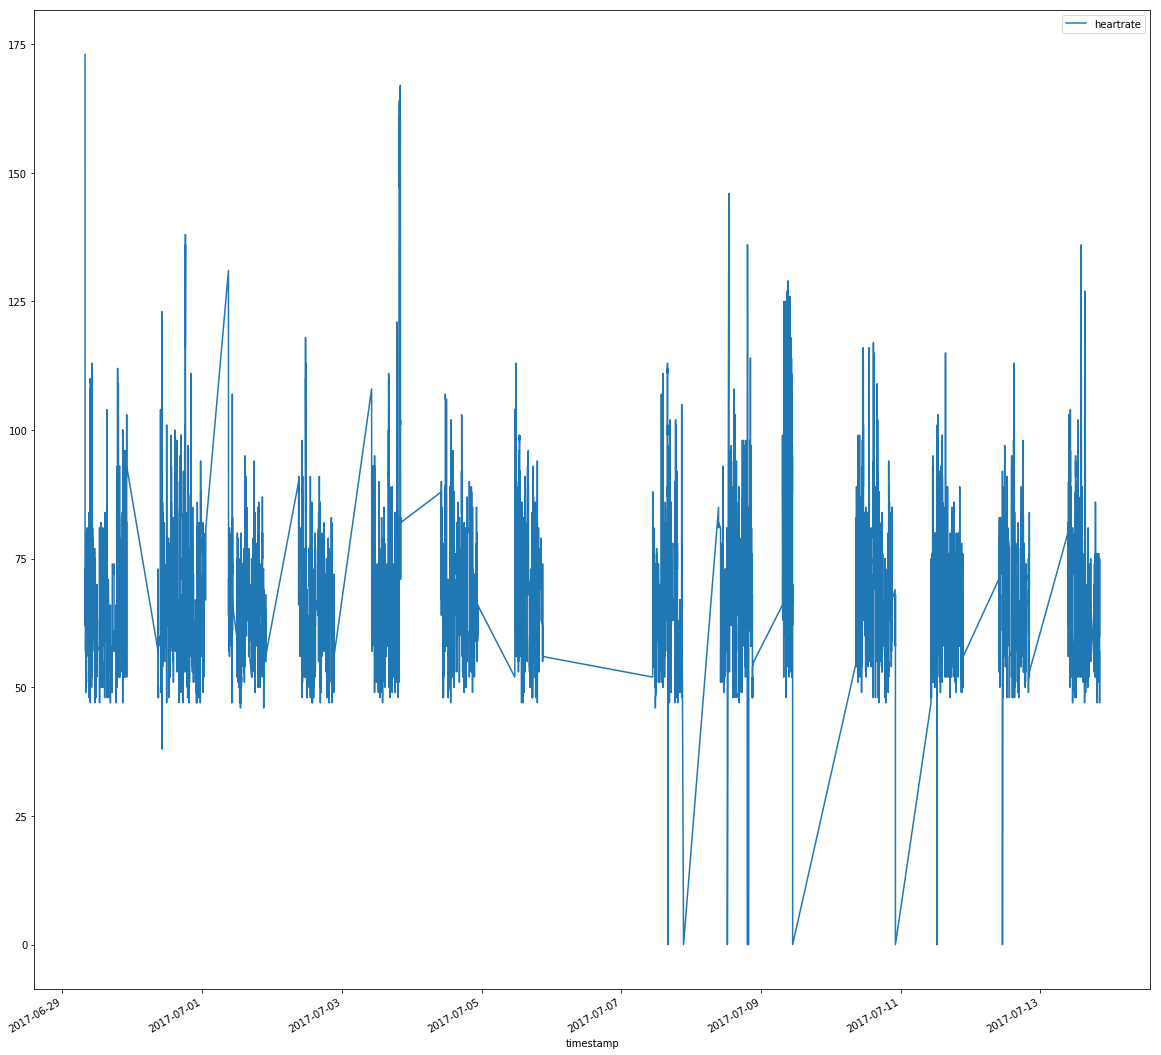

In [69]:
dfheart.plot(figsize=(20,20))

In [70]:
dfheart.describe()

,heartrate
count,91337.000000
mean,69.026638
std,12.103701
min,0.000000
25%,61.000000
50%,67.000000
75%,74.000000
max,173.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15069bd30>]],
      dtype=object)

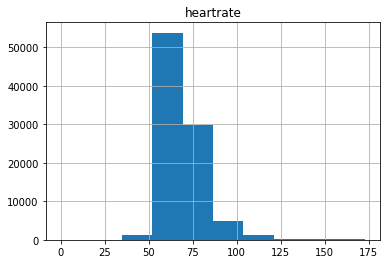

In [71]:
dfheart.hist()

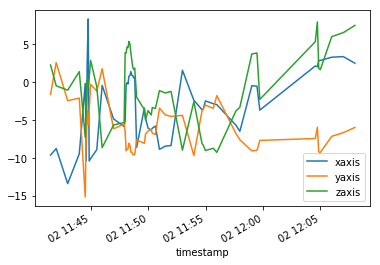

In [72]:
df['07-02-2017 11:41':'07-02-2017 12:21'].plot()

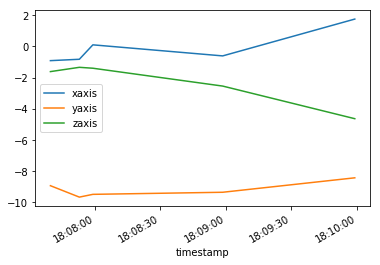

In [73]:
df['07-03-2017 17:56':'07-03-2017 18:10'].plot()

,xaxis,yaxis,zaxis
count,8.000000,8.000000,8.000000
mean,2.680162,-6.760885,2.940767
std,3.021392,3.212355,4.459470
min,-3.317932,-9.298126,-1.625366
25%,2.409546,-9.103302,-1.061230
50%,3.624062,-8.052841,2.449745
75%,4.287044,-5.811871,5.121796
max,5.499924,-0.803009,9.484573


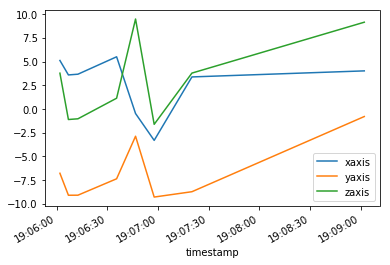

In [74]:
#walk
df['2017-07-04 19:03':'2017-07-04 19:21'].plot()
df['2017-07-04 19:03':'2017-07-04 19:21'].describe()

count     8.000000
mean      9.791131
std       0.325569
min       9.265813
25%       9.712695
50%       9.895543
75%      10.009327
max      10.098144
dtype: float64

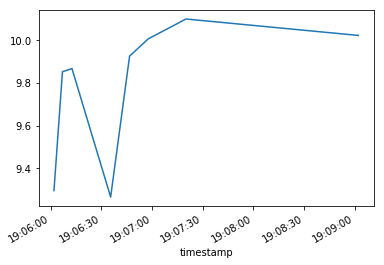

In [75]:
#walk
magmonth['2017-07-04 19:03':'2017-07-04 19:21'].plot()
magmonth['2017-07-04 19:03':'2017-07-04 19:21'].describe()

,xaxis,yaxis,zaxis
count,11.000000,11.000000,11.000000
mean,0.252164,-2.502196,8.527507
std,2.039452,3.846072,1.687238
min,-1.149734,-6.192841,4.727402
25%,-0.632706,-4.495422,8.454582
50%,-0.507736,-3.358231,9.299850
75%,0.252663,-2.695038,9.494446
max,6.172684,7.916428,9.937912


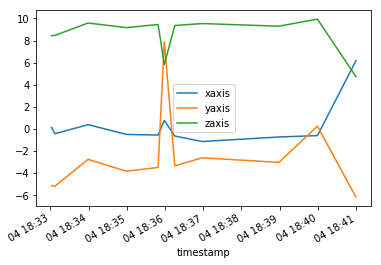

In [76]:
#walk
df['2017-07-04 18:33':'2017-07-04 18:41'].plot()
df['2017-07-04 18:33':'2017-07-04 18:41'].describe()

count    11.000000
mean      9.942578
std       0.072897
min       9.812789
25%       9.916875
50%       9.955776
75%       9.963433
max      10.095119
dtype: float64

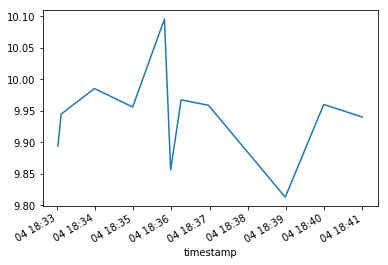

In [77]:
#walk magnitude
magmonth['2017-07-04 18:33':'2017-07-04 18:41'].plot()
magmonth['2017-07-04 18:33':'2017-07-04 18:41'].describe()

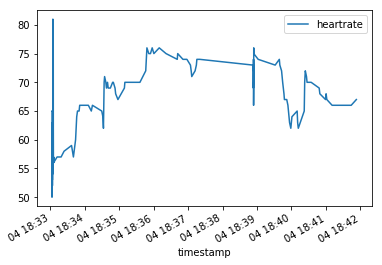

In [78]:
#walk heart
dfheart['2017-07-04 18:33':'2017-07-04 18:41'].plot()
#dfheart['2017-07-04 18:33':'2017-07-04 18:41'].describe()

,xaxis,yaxis,zaxis
count,9.000000,9.000000,9.000000
mean,-8.752235,-3.147302,3.868332
std,3.663755,2.941396,3.190471
min,-13.302826,-7.695206,-1.901779
25%,-12.461380,-4.248398,1.855454
50%,-8.519577,-2.523376,5.692154
75%,-6.308044,-1.005692,5.735962
max,-3.480377,1.113419,7.494385


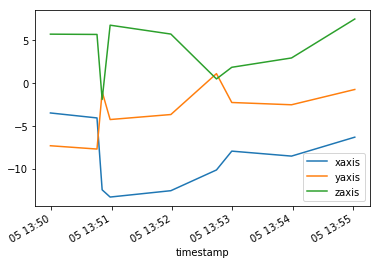

In [79]:
#another walk
df['2017-07-05 13:49':'2017-07-05 13:57'].plot()
df['2017-07-05 13:49':'2017-07-05 13:57'].describe()

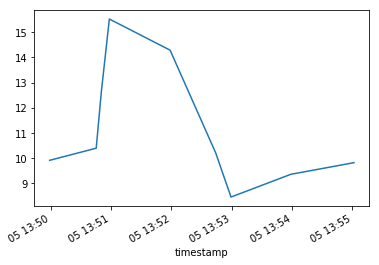

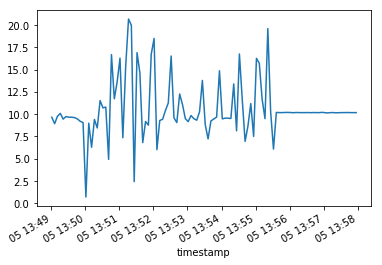

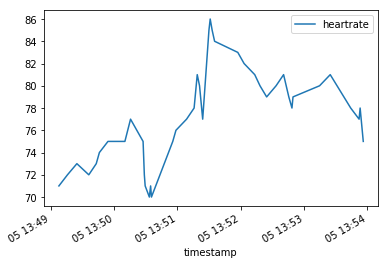

count    108.000000
mean      10.591878
std        3.188671
min        0.710619
25%        9.424309
50%       10.171981
75%       10.732492
max       20.669551
dtype: float64

In [80]:
#walk
magmonth['2017-07-05 13:49':'2017-07-05 13:57'].plot()
plt.show()
magmonth['2017-07-05 13:49':'2017-07-05 13:57'].describe()
magphone['2017-07-05 13:49':'2017-07-05 13:57'].plot()
plt.show()
dfheart['2017-07-05 13:49':'2017-07-05 13:57'].plot()
plt.show()
#dfheart['2017-07-05 13:49':'2017-07-05 13:57'].describe()
magphone['2017-07-05 13:49':'2017-07-05 13:57'].describe()


,xaxis,yaxis,zaxis
count,9.000000,9.000000,9.000000
mean,-3.268026,-5.284910,0.291777
std,7.262600,1.940019,3.228992
min,-9.333481,-9.291534,-3.278442
25%,-8.736008,-6.191406,-2.010956
50%,-8.675919,-4.098404,-0.300415
75%,2.239731,-3.965637,-0.125519
max,8.785599,-3.376907,6.452667


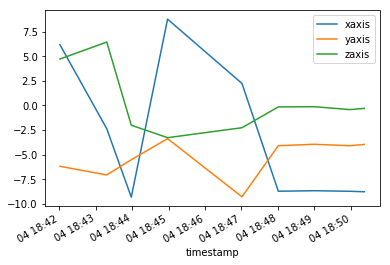

In [81]:
#train
df['2017-07-04 18:41':'2017-07-04 19:03'].plot()
df['2017-07-04 18:41':'2017-07-04 19:03'].describe()


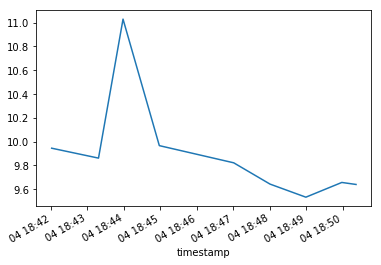

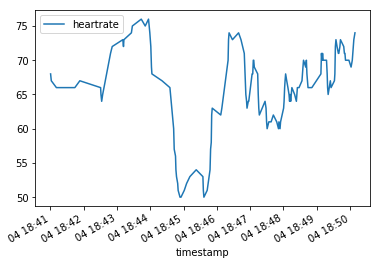

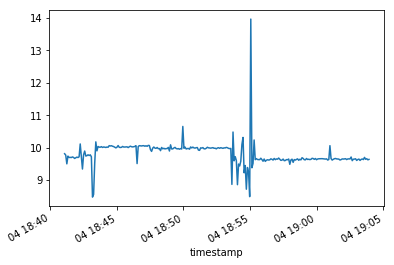

In [82]:
#trainmagnitude
magmonth['2017-07-04 18:41':'2017-07-04 19:03'].plot()

magmonth['2017-07-04 18:41':'2017-07-04 19:03'].describe()
plt.show()
#heart
dfheart['2017-07-04 18:41':'2017-07-04 19:03'].plot()
plt.show()
#phone
magphone['2017-07-04 18:41':'2017-07-04 19:03'].plot()
plt.show()


In [83]:
#dfheart['2017-07-04 18:41':'2017-07-04 19:03'].describe()

,xaxis,yaxis,zaxis
count,72.000000,72.000000,72.000000
mean,-0.833227,-3.709203,7.151423
std,3.448053,3.874353,2.208859
min,-6.786163,-9.128860,0.584000
25%,-3.921452,-5.897129,7.327930
50%,-1.475052,-5.773621,7.862610
75%,2.006988,-1.326988,8.128547
max,8.602798,8.324402,9.438477


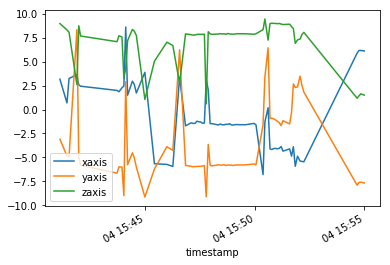

In [84]:
#train
df['2017-07-04 15:41':'2017-07-04 16:07'].plot()
df['2017-07-04 15:41':'2017-07-04 16:07'].describe()

count    72.000000
mean      9.839307
std       0.349883
min       7.589710
25%       9.889038
50%       9.907617
75%       9.919654
max      10.860067
dtype: float64

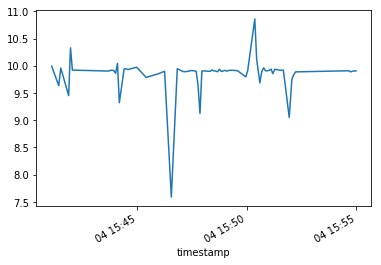

In [85]:
#train
magmonth['2017-07-04 15:41':'2017-07-04 16:07'].plot()
magmonth['2017-07-04 15:41':'2017-07-04 16:07'].describe()

,xaxis,yaxis,zaxis
count,11.000000,11.000000,11.000000
mean,-4.359340,-7.054889,5.826839
std,1.088126,0.441969,0.301314
min,-6.834778,-7.861603,5.224213
25%,-4.569443,-7.289986,5.681206
50%,-4.089096,-7.017288,5.803238
75%,-3.489113,-6.732857,5.997528
max,-3.336487,-6.460403,6.333572


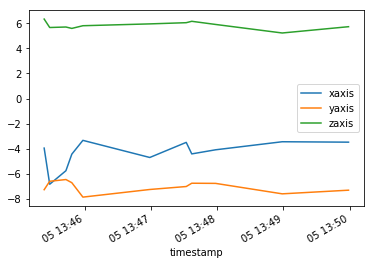

In [86]:
#train
df['2017-07-05 13:31':'2017-07-05 13:49'].plot()
df['2017-07-05 13:31':'2017-07-05 13:49'].describe()

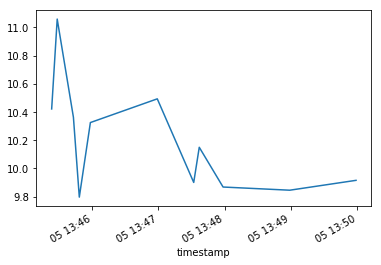

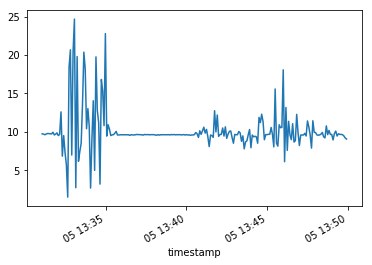

In [87]:
#train
magmonth['2017-07-05 13:31':'2017-07-05 13:49'].plot()
plt.show()
magphone['2017-07-05 13:31':'2017-07-05 13:49'].plot()
plt.show()
#magmonth['2017-07-05 13:31':'2017-07-05 13:49'].describe()

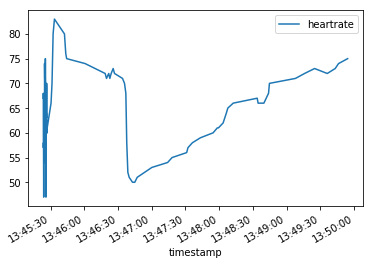

In [88]:
dfheart['2017-07-05 13:31':'2017-07-05 13:49'].plot()


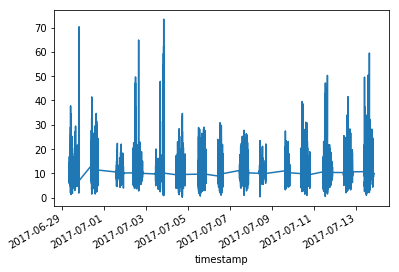

In [89]:
magphone.plot()

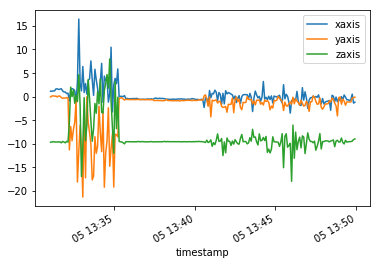

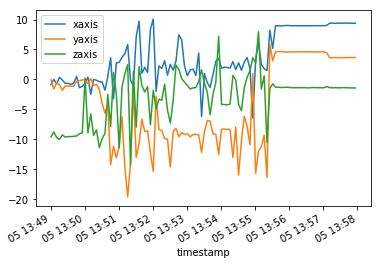

In [90]:
#train
dfphone['2017-07-05 13:31':'2017-07-05 13:49'].plot()
plt.show()
#wakling
dfphone['2017-07-05 13:49':'2017-07-05 13:57'].plot()
plt.show()


            xaxis       yaxis       zaxis
count  274.000000  274.000000  274.000000
mean     3.892580   -0.922170   -7.329057
std      3.615592    2.627844    2.569926
min     -4.593647  -13.706697  -10.226734
25%      0.571212   -0.789758   -9.580078
50%      2.423760   -0.591570   -6.623427
75%      7.647298    0.260458   -6.101313
max      8.480764    1.465752    1.748364


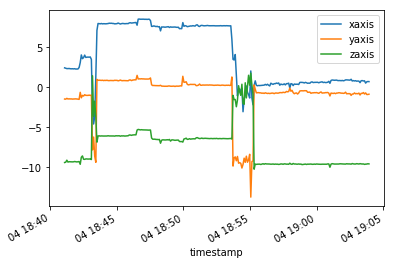

            xaxis       yaxis       zaxis
count  108.000000  108.000000  108.000000
mean     2.401872   -1.563149   -9.249034
std      0.081767    0.226151    0.046183
min      2.212998   -1.700464   -9.393267
25%      2.353107   -1.616638   -9.268726
50%      2.390230   -1.601071   -9.250763
75%      2.447710   -1.572929   -9.232800
max      2.804568    0.684976   -9.031619


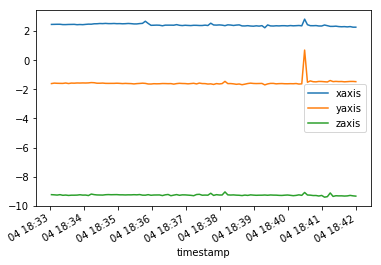

In [91]:
#anothertrain
dfphone['2017-07-04 18:41':'2017-07-04 19:03'].plot()
print(dfphone['2017-07-04 18:41':'2017-07-04 19:03'].describe())
plt.show()

#another walking
dfphone['2017-07-04 18:33':'2017-07-04 18:41'].plot()
print(dfphone['2017-07-04 18:33':'2017-07-04 18:41'].describe())
plt.show()


In [92]:

data_l1=preprocessing.normalize(xyzphone, norm='l1')
data_l2=preprocessing.normalize(xyzphone, norm='l2')

In [93]:
data_l1

array([[-0.05812245,  0.32636735,  0.6155102 ],
       [ 0.036407  ,  0.36327505,  0.60031796],
       [ 0.05629432, -0.86812944,  0.07557624],
       ...,
       [ 0.60762668, -0.32647601, -0.06589731],
       [ 0.62178829, -0.3359027 , -0.04230901],
       [ 0.63558731, -0.3335657 , -0.03084699]])

In [94]:
data_l2

array([[-0.08313846,  0.4668365 ,  0.88042699],
       [ 0.051816  ,  0.51702866,  0.85439831],
       [ 0.06446682, -0.99415968,  0.08654798],
       ...,
       [ 0.87690641, -0.47115921, -0.09510078],
       [ 0.87825188, -0.47444957, -0.05975984],
       [ 0.88464884, -0.46427691, -0.0429347 ]])

In [95]:
normxaxisphone=[]
normyaxisphone=[]
normzaxisphone=[]
for n in data_l2:
    normxaxisphone.append(n[0])
    normyaxisphone.append(n[1])
    normzaxisphone.append(n[2])

In [96]:
normphoneseries = [('timestamp',dfphone.index),
         ('xaxis', normxaxisphone),
         ('yaxis', normyaxisphone),
         ('zaxis', normzaxisphone),
         ]

normxaxisphone


[-0.08313846460475188,
 0.0518160002409481,
 0.0644668230129524,
 -0.02067201733373917,
 0.015609731236455518,
 -0.004594409600214195,
 0.019659970579229778,
 0.018336620777822374,
 0.019207200567935057,
 0.03772749103767915,
 0.030148340132427266,
 0.03235929385076328,
 0.09328225633058045,
 0.13583068558457367,
 0.358771089996105,
 0.3616537929813565,
 0.35889754658805056,
 0.3589749047610034,
 0.354073912779603,
 0.35603910807096945,
 0.3597212682207407,
 0.3667425949966684,
 0.24326445795166504,
 0.33379206392932587,
 0.3414031411517563,
 0.34282979007039127,
 0.3019467173525574,
 0.012082767566563953,
 0.13973907448281597,
 -0.2440460129267198,
 -0.7733006527991817,
 0.03329567621618607,
 -0.10619342140476745,
 -0.07074032061621799,
 -0.11145506878700952,
 -0.19837311383609918,
 -0.09861880212235302,
 -0.0648272004121726,
 -0.084541992453733,
 -0.07589161814038439,
 -0.07040938279138309,
 -0.15125693441552598,
 -0.004815493659981864,
 -0.04131432233516476,
 -0.05920609684919553,
 

In [97]:
dfnormphone = pd.DataFrame.from_items(normphoneseries)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  """Entry point for launching an IPython kernel.


In [98]:
dfnormphone['timestamp']=pd.to_datetime(dfnormphone['timestamp'])
dfnormphone.index=dfnormphone['timestamp']
del dfnormphone['timestamp']


In [99]:
dfnormphone.head()

,xaxis,yaxis,zaxis
timestamp,,,
2017-06-29 07:45:21.520,-0.083138,0.466837,0.880427
2017-06-29 07:45:26.542,0.051816,0.517029,0.854398
2017-06-29 07:45:31.548,0.064467,-0.994160,0.086548
2017-06-29 07:45:36.552,-0.020672,-0.950402,-0.310335
2017-06-29 07:45:41.626,0.015610,-0.944261,-0.328828


            xaxis       yaxis       zaxis
count  274.000000  274.000000  274.000000
mean     0.390162   -0.096512   -0.749733
std      0.362678    0.270388    0.269678
min     -0.537064   -0.999488   -0.999856
25%      0.059191   -0.081995   -0.994276
50%      0.248327   -0.061373   -0.663224
75%      0.766208    0.026105   -0.609422
max      0.844781    0.154226    0.167136


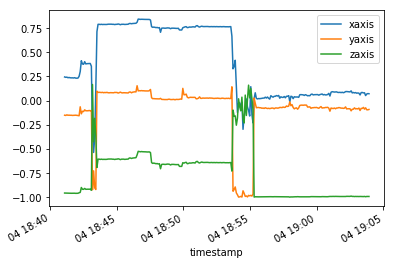

            xaxis       yaxis       zaxis
count  108.000000  108.000000  108.000000
mean     0.247985   -0.161346   -0.954907
std      0.008599    0.023438    0.002374
min      0.229163   -0.176089   -0.960720
25%      0.242637   -0.166825   -0.955919
50%      0.246645   -0.165280   -0.954599
75%      0.252604   -0.162265   -0.953595
max      0.294649    0.071964   -0.948129


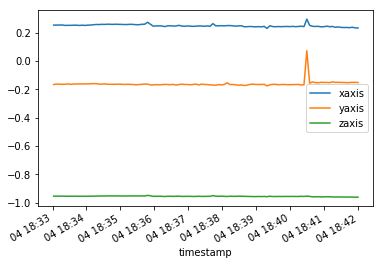

In [100]:
#anothertrain
dfnormphone['2017-07-04 18:41':'2017-07-04 19:03'].plot()
print(dfnormphone['2017-07-04 18:41':'2017-07-04 19:03'].describe())
plt.show()

#another walking
dfnormphone['2017-07-04 18:33':'2017-07-04 18:41'].plot()
print(dfnormphone['2017-07-04 18:33':'2017-07-04 18:41'].describe())
plt.show()

            xaxis       yaxis       zaxis
count  227.000000  227.000000  227.000000
mean     0.010155   -0.216973   -0.847568
std      0.174273    0.281344    0.354908
min     -0.813923   -0.983906   -0.999924
25%     -0.060856   -0.195218   -0.995636
50%     -0.037479   -0.090195   -0.992639
75%      0.063041   -0.066234   -0.968759
max      0.795671    0.039051    0.559466


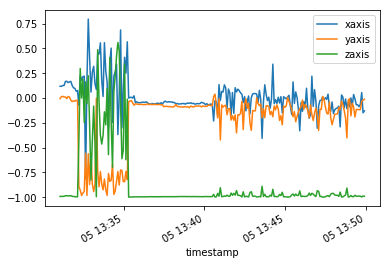

           xaxis      yaxis      zaxis
count  48.000000  48.000000  48.000000
mean    0.083199  -0.546577  -0.501464
std     0.297273   0.384533   0.464813
min    -0.947062  -0.981629  -0.997949
25%    -0.068648  -0.902091  -0.988905
50%     0.058434  -0.722621  -0.471993
75%     0.234683  -0.116142  -0.127887
max     0.665509   0.024744   0.545395


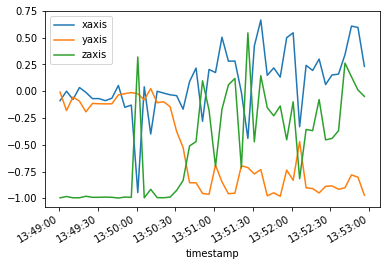

In [101]:
#train
dfnormphone['2017-07-05 13:31':'2017-07-05 13:49'].plot()
print(dfnormphone['2017-07-05 13:31':'2017-07-05 13:49'].describe())
plt.show()
#wakling
dfnormphone['2017-07-05 13:49':'2017-07-05 13:52'].plot()
print(dfnormphone['2017-07-05 13:49':'2017-07-05 13:52'].describe())
plt.show()

            xaxis       yaxis       zaxis
count  227.000000  227.000000  227.000000
mean     0.090946   -0.232483   -0.857572
std      0.192579    0.265964    0.308743
min     -0.527148   -0.994160   -0.996098
25%      0.078543   -0.148649   -0.984918
50%      0.121082   -0.136531   -0.980080
75%      0.166307   -0.131171   -0.950361
max      0.455512   -0.008998    0.274356
            xaxis       yaxis       zaxis
count  323.000000  323.000000  323.000000
mean     0.261167   -0.084004   -0.939328
std      0.175246    0.086286    0.066127
min      0.050703   -0.342875   -0.994282
25%      0.124420   -0.120571   -0.985633
50%      0.170331   -0.082058   -0.973951
75%      0.403003   -0.055265   -0.913145
max      0.632342    0.197786   -0.763788


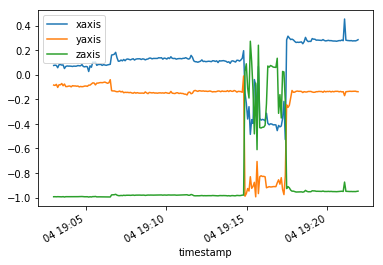

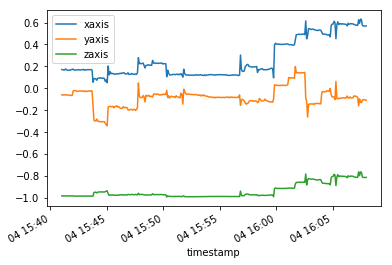

In [102]:
#walk
dfnormphone['2017-07-04 19:03':'2017-07-04 19:21'].plot()
print(dfnormphone['2017-07-04 19:03':'2017-07-04 19:21'].describe())
#train
dfnormphone['2017-07-04 15:41':'2017-07-04 16:07'].plot()
print(dfnormphone['2017-07-04 15:41':'2017-07-04 16:07'].describe())

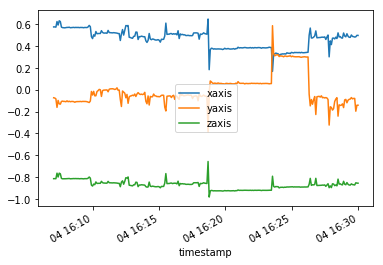

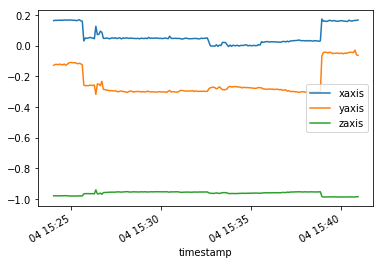

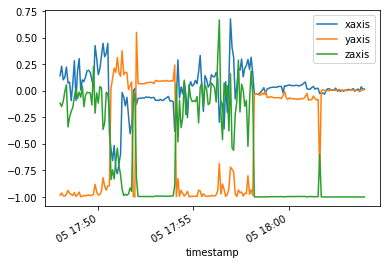

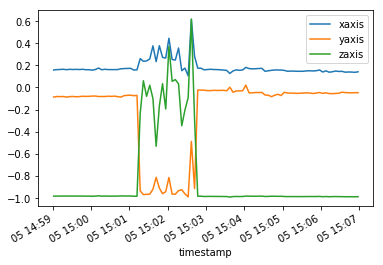

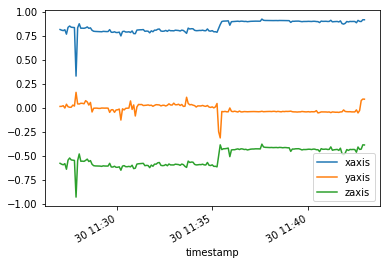

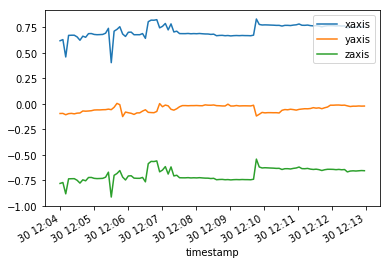

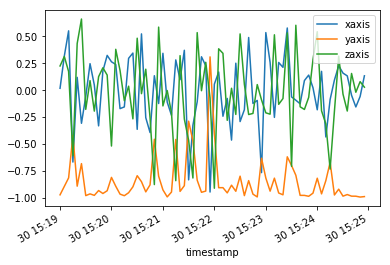

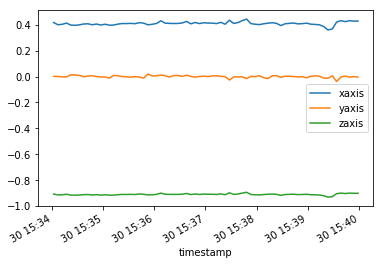

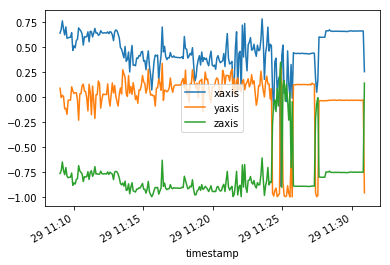

In [103]:
#walk
dfnormphone['2017-07-04 16:07':'2017-07-04 16:29'].plot()
dfnormphone['2017-07-04 15:24':'2017-07-04 15:40'].plot()
dfnormphone['2017-07-05 17:48':'2017-07-05 18:03'].plot()
dfnormphone['2017-07-05 14:59':'2017-07-05 15:06'].plot()
dfnormphone['2017-06-30 11:27':'2017-06-30 11:42'].plot()
dfnormphone['2017-06-30 12:04':'2017-06-30 12:12'].plot()
dfnormphone['2017-06-30 15:19':'2017-06-30 15:24'].plot()
dfnormphone['2017-06-30 15:34':'2017-06-30 15:39'].plot()
dfnormphone['2017-06-29 11:09':'2017-06-29 11:30'].plot()

                            xaxis     yaxis     zaxis
timestamp                                            
2017-06-29 11:23:03.952  0.451927  0.047440 -0.890793
2017-06-29 11:23:08.953  0.405751 -0.083564 -0.910155
2017-06-29 11:23:13.955  0.517250 -0.023439 -0.855513
2017-06-29 11:23:18.992  0.461847  0.112551 -0.879790
2017-06-29 11:23:24.016  0.468878  0.109912 -0.876398
2017-06-29 11:23:29.042  0.574185  0.256636 -0.777463
2017-06-29 11:23:34.052  0.779465  0.144832 -0.609474
2017-06-29 11:23:39.058  0.561910  0.065724 -0.824583
2017-06-29 11:23:44.066  0.175721 -0.000223 -0.984440
2017-06-29 11:23:49.072  0.438965  0.143592 -0.886956
2017-06-29 11:23:54.093  0.509968  0.207685 -0.834745
2017-06-29 11:23:59.097  0.697605  0.129910 -0.704607


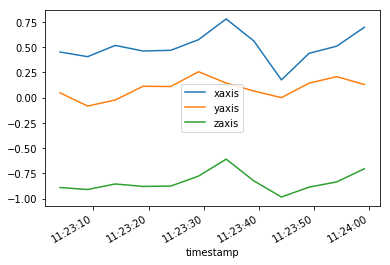

In [104]:
print(dfnormphone['2017-06-29 11:23':'2017-06-29 11:23'])
dfnormphone['2017-06-29 11:23':'2017-06-29 11:23'].plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x157e22a58>,
      dtype=object)

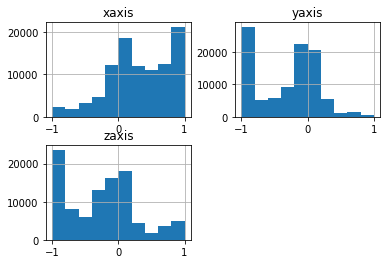

In [105]:
dfnormphone.hist()

In [106]:
def plot_corr(dataset,size=3):
    corr=dataset.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.title('title')

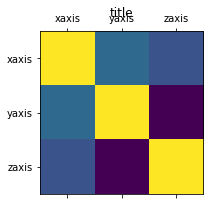

In [107]:
plot_corr(dfphone)

In [108]:
dfnormphone.mean()

xaxis    0.316257
yaxis   -0.320930
zaxis   -0.254275
dtype: float64

In [109]:
datawatch

,index,source,values
timestamp,,,
2017-06-29 07:45:56.262,164349,battery,['98']
2017-06-29 07:46:01.263,164350,accelerometer,"['-0.3440857', '0.68330383', '9.967361']"
2017-06-29 07:46:01.324,164351,gravity,"['-0.34131828', '0.6573288', '9.778641']"
2017-06-29 07:46:01.329,164352,linear_acceleration,"['-0.018068999', '0.034808993', '-0.033065796']"
2017-06-29 07:46:01.402,164353,gyroscope,"['0.0041656494', '-0.0132751465', '0.006164551']"
2017-06-29 07:46:01.464,164354,pressure,['969.3651']
2017-06-29 07:46:01.509,164355,orientation,"['31.284260813896044', '-3.3376453624603086', ..."
2017-06-29 07:46:01.661,164356,magnetometer,"['-15.32135', '24.88861', '-44.90509']"
2017-06-29 07:46:01.719,164357,rotation_vector,"['0.036942374', '0.007465202', '-0.25660786', ..."


In [116]:
dataphone2['timestamp']=pd.to_datetime(dataphone2['timestamp'])

In [112]:
report['from']=pd.to_datetime(report['from'])

In [113]:
report['to']=pd.to_datetime(report['to'])

In [124]:
report['to'].values.sort()
report['to']

0     2017-06-29 10:17:00
1     2017-06-29 11:07:00
2     2017-06-29 12:29:00
3     2017-06-29 12:40:00
4     2017-06-29 13:01:00
5     2017-06-29 13:02:00
6     2017-06-29 13:24:00
7     2017-06-29 13:44:00
8     2017-06-29 16:07:00
9     2017-06-29 16:44:00
10    2017-06-29 21:22:00
11    2017-06-29 21:36:00
12    2017-06-29 22:20:00
13    2017-06-30 11:08:00
14    2017-06-30 11:42:00
15    2017-06-30 12:04:00
16    2017-06-30 12:12:00
17    2017-06-30 13:48:00
18    2017-06-30 15:19:00
19    2017-06-30 15:19:00
20    2017-06-30 15:24:00
21    2017-06-30 15:34:00
22    2017-06-30 15:39:00
23    2017-06-30 16:32:00
24    2017-06-30 16:41:00
25    2017-06-30 17:03:00
26    2017-06-30 17:25:00
27    2017-06-30 17:34:00
28    2017-06-30 18:42:00
29    2017-06-30 19:12:00
              ...        
121   2017-07-10 16:49:00
122   2017-07-10 17:27:00
123   2017-07-10 17:34:00
124   2017-07-10 17:40:00
125   2017-07-10 17:45:00
126   2017-07-10 18:01:00
127   2017-07-10 18:07:00
128   2017-0

In [119]:
d = '00:00:00'
for n in dataphone2['timestamp'].values:
    for m in report['to'].values:
        if abs(n-m) < d:
            print(m)

TypeError: '<' not supported between instances of 'numpy.ndarray' and 'str'